### Lanjut Analisis Sentimen Tweetizen

Load dulu data .json yang sudah disimpan

In [3]:
data = pd.read_json('doctorstrange.json')
data = pd.DataFrame(data=[tweet for tweet in data['text']], columns=['Tweet'])

In [3]:
data

,Tweet
0,RT @fadecorner: Wanda when she was chasing Doc...
1,RT @MCU_Direct: Official new #MultiverseOfMadn...
2,RT @PopCrave: New posters of Elizabeth Olsen a...
3,RT @MCU_Direct: #MultiverseOfMadness director ...
4,RT @SupermanEnjoyer: Doctor Strange is the bes...
...,...
995,"""I love you in every universe"" - Doctor Strang..."
996,RT @ironfamiIy: doctor strange: stephen's supe...
997,RT @Ayatay221: Benedict Cumberbatch being phot...
998,doctor strange in the multiverse of madness (2...


Bersihkan data dari simbol-simbol dan teks yang tidak diinginkan

In [4]:
# Cleaning tweets
import re

def CleanUpTweet(text):
       
    text = text['Tweet']
    #Remove mention
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)
    #Remove hashtags
    text = re.sub(r'#', '', text)
    #Remove retweets
    text = re.sub(r'RT : ', '', text)
    #Remove urls
    text = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', text)
    #Text to lower
    text = text.lower()
    #Remove hashtags fields
    text = re.sub(r'ww84', '', text)
    text = re.sub(r'\n', '', text)
    #Remove symbol
    text = re.sub('[^a-zA-Z#]', ' ', text)
    
    return text

Buat satu kolom lagi dalam dataframe untuk hasil tweets yang sudah dibersihkan/dinormalisasi

In [5]:
data['Normalize'] = data.apply(CleanUpTweet, axis=1)

data['Normalize'][0]

'wanda when she was chasing doctor strange thru that underground corridor  '

Mari kita cek 5 baris data pertama, apakah sudah bersih?

In [117]:
data.head()

,Tweet,Normalize
0,RT @fadecorner: Wanda when she was chasing Doc...,wanda when she was chasing doctor strange thru...
1,RT @MCU_Direct: Official new #MultiverseOfMadn...,official new multiverseofmadness posters for d...
2,RT @PopCrave: New posters of Elizabeth Olsen a...,new posters of elizabeth olsen and benedict cu...
3,RT @MCU_Direct: #MultiverseOfMadness director ...,multiverseofmadness director sam raimi didn t ...
4,RT @SupermanEnjoyer: Doctor Strange is the bes...,doctor strange is the best mcu origin film by ...


Bagaimana dengan 5 baris terakhir?

In [118]:
data.tail()

,Tweet,Normalize
995,"""I love you in every universe"" - Doctor Strang...",i love you in every universe doctor strang...
996,RT @ironfamiIy: doctor strange: stephen's supe...,doctor strange stephen s superhero eradoctor ...
997,RT @Ayatay221: Benedict Cumberbatch being phot...,benedict cumberbatch being photographed for do...
998,doctor strange in the multiverse of madness (2...,doctor strange in the multiverse of madness ...
999,RT @MarvelStudios: Who are you in this vast Mu...,who are you in this vast multiverse don t m...


ya, sudah bersih.. lanjut

Mari kita bersihkan stopwords (kata hubung), disini saya menggunakan corpus stopwords dari nltk

In [6]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['New'] = data['Normalize'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [120]:
data.head()

,Tweet,Normalize,New
0,RT @fadecorner: Wanda when she was chasing Doc...,wanda when she was chasing doctor strange thru...,wanda chasing doctor strange thru underground ...
1,RT @MCU_Direct: Official new #MultiverseOfMadn...,official new multiverseofmadness posters for d...,official new multiverseofmadness posters docto...
2,RT @PopCrave: New posters of Elizabeth Olsen a...,new posters of elizabeth olsen and benedict cu...,new posters elizabeth olsen benedict cumberbat...
3,RT @MCU_Direct: #MultiverseOfMadness director ...,multiverseofmadness director sam raimi didn t ...,multiverseofmadness director sam raimi origina...
4,RT @SupermanEnjoyer: Doctor Strange is the bes...,doctor strange is the best mcu origin film by ...,doctor strange best mcu origin film mile


Lanjut kita kalkulasikan nilai Subjektivitas dan Polaritas dari setiap kalimat

**Subjektivitas** mengukur jumlah pendapat pribadi dan informasi faktual yang terkandung dalam teks.  
Subjektivitas bernilai float pada kisaran [0,1] dimana nilai yang mendekati 1 berarti teks berisi opini pribadi dan nilai yang mendekati 0 berisi informasi faktual.

**Polaritas** mengukur seberapa positif atau negatif sebuah teks.  
Polaritas bernilai float pada kisaran [-1,1] dimana 1 berarti pernyataan positif dan -1 berarti pernyataan negatif.

In [7]:
# Text Subjectivity and Polarity
from textblob import TextBlob

def getTextSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getTextPolarity(text):
    return TextBlob(text).sentiment.polarity

In [8]:
data['Subjectivity'] = data['New'].apply(getTextSubjectivity)
data['Polarity'] = data['New'].apply(getTextPolarity)
data.head()

,Tweet,Normalize,New,Subjectivity,Polarity
0,RT @fadecorner: Wanda when she was chasing Doc...,wanda when she was chasing doctor strange thru...,wanda chasing doctor strange thru underground ...,0.150000,-0.050000
1,RT @MCU_Direct: Official new #MultiverseOfMadn...,official new multiverseofmadness posters for d...,official new multiverseofmadness posters docto...,0.454545,0.136364
2,RT @PopCrave: New posters of Elizabeth Olsen a...,new posters of elizabeth olsen and benedict cu...,new posters elizabeth olsen benedict cumberbat...,0.302273,0.043182
3,RT @MCU_Direct: #MultiverseOfMadness director ...,multiverseofmadness director sam raimi didn t ...,multiverseofmadness director sam raimi origina...,0.433333,0.041667
4,RT @SupermanEnjoyer: Doctor Strange is the bes...,doctor strange is the best mcu origin film by ...,doctor strange best mcu origin film mile,0.225000,0.475000


In [9]:
data.tail()

,Tweet,Normalize,New,Subjectivity,Polarity
995,"""I love you in every universe"" - Doctor Strang...",i love you in every universe doctor strang...,love every universe doctor strangegrabe yuuuun,0.60,0.50
996,RT @ironfamiIy: doctor strange: stephen's supe...,doctor strange stephen s superhero eradoctor ...,doctor strange stephen superhero eradoctor str...,0.15,-0.05
997,RT @Ayatay221: Benedict Cumberbatch being phot...,benedict cumberbatch being photographed for do...,benedict cumberbatch photographed doctor stran...,0.15,-0.05
998,doctor strange in the multiverse of madness (2...,doctor strange in the multiverse of madness ...,doctor strange multiverse madness,0.15,-0.05
999,RT @MarvelStudios: Who are you in this vast Mu...,who are you in this vast multiverse don t m...,vast multiverse miss marvel studios doctorstra...,1.00,0.00


In [10]:
data['New'][998]

'doctor strange multiverse madness'

In [9]:
# Sentiment label

def getTextAnalysis(val):
    if val < 0:
        return 'Negative'
    elif val == 0:
        return 'Neutral'
    else:
        return 'Positive'
def getScore(score):
    if score < 0:
        return -1
    elif score == 0:
        return 0
    else:
        return 1

In [10]:
data = data.drop(['Tweet', 'Normalize'], axis=1)

In [11]:
data['Score'] = data['Polarity'].apply(getScore)
data.head()

,New,Subjectivity,Polarity,Score
0,wanda chasing doctor strange thru underground ...,0.150000,-0.050000,-1
1,official new multiverseofmadness posters docto...,0.454545,0.136364,1
2,new posters elizabeth olsen benedict cumberbat...,0.302273,0.043182,1
3,multiverseofmadness director sam raimi origina...,0.433333,0.041667,1
4,doctor strange best mcu origin film mile,0.225000,0.475000,1


In [12]:
data['Label'] = data['Score'].apply(getTextAnalysis)
data.head()

,New,Subjectivity,Polarity,Score,Label
0,wanda chasing doctor strange thru underground ...,0.150000,-0.050000,-1,Negative
1,official new multiverseofmadness posters docto...,0.454545,0.136364,1,Positive
2,new posters elizabeth olsen benedict cumberbat...,0.302273,0.043182,1,Positive
3,multiverseofmadness director sam raimi origina...,0.433333,0.041667,1,Positive
4,doctor strange best mcu origin film mile,0.225000,0.475000,1,Positive


In [15]:
data.tail()

,New,Subjectivity,Polarity,Score,Label
995,love every universe doctor strangegrabe yuuuun,0.60,0.50,1,Positive
996,doctor strange stephen superhero eradoctor str...,0.15,-0.05,-1,Negative
997,benedict cumberbatch photographed doctor stran...,0.15,-0.05,-1,Negative
998,doctor strange multiverse madness,0.15,-0.05,-1,Negative
999,vast multiverse miss marvel studios doctorstra...,1.00,0.00,0,Neutral


mari kita lihat perbandingan sentimennya

In [17]:
labels = data.groupby('Label').size()
labels

Label
Negative    446
Neutral     197
Positive    357
dtype: int64

<AxesSubplot:title={'center':'Hasil Sentimen w/ Judul'}, xlabel='Sentimen', ylabel='Jumlah Tweet'>

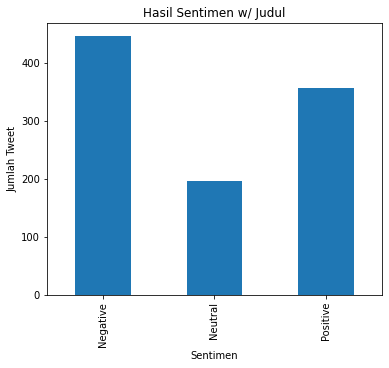

In [18]:
labels.plot(kind='bar', title='Hasil Sentimen w/ Judul', ylabel='Jumlah Tweet',
           xlabel='Sentimen', figsize=(6, 5))

oke, terlihat dari bar chart diatas tweet yang mengandung muatan positif mengenai 'doctor strange' tidak lebih banyak (357 tweet) dibandingkan dengan tweet yang bermuatan negatif (446 tweet).  
sedangkan tweet yang bermuatan netral jumlahnya paling sedikit (197 tweet).  
tapi tunggu dulu..  
lihat ini..

In [153]:
data.loc[998]

New             doctor strange multiverse madness
Subjectivity                                 0.15
Polarity                                    -0.05
Score                                          -1
Label                                    Negative
Count                                           1
Name: 998, dtype: object

bukankan tweet tersebut hanya mengandung judul filmnya?  
  
ya, hasil polaritas yang didapat menunjukan bahwa tweet yang mengandung judul film yaitu **'doctor strange: in the multiverse of madness'** sudah dinilai mengandung muatan negatif.  
karena susunan kata tersebut memang merupakan pernyataan yang bersifat negatif.  
**strange** dan **madness** adalah dua kata yang bermuatan negatif.

jadi?  
  
salah satu solusi yang bisa diterapkan adalah dengan membersihkan kata-kata **madness** dan **strange** dalam setiap kalimat/tweet.

### **OK mari kita coba**

In [13]:
def CleanTitle(text):
    text = text['New']
    #Remove Title
    text = re.sub(r'madness',' ', text)
    text = re.sub(r'strange', ' ', text)
    
    return text

hasil analisis dari data pertama kita biarkan, kita buat dataframe baru dengan mengcopy data sebelumnya untuk menampung hasil percobaan.

In [14]:
data2 = data.copy()

In [15]:
data2['Clean'] = data2.apply(CleanTitle, axis=1)

In [16]:
data2 = data2.drop(['Subjectivity', 'Polarity', 'Score', 'Label'], axis=1)

In [17]:
data2.head()

,New,Clean
0,wanda chasing doctor strange thru underground ...,wanda chasing doctor thru underground corridor
1,official new multiverseofmadness posters docto...,official new multiverseof posters doctor amp...
2,new posters elizabeth olsen benedict cumberbat...,new posters elizabeth olsen benedict cumberbat...
3,multiverseofmadness director sam raimi origina...,multiverseof director sam raimi originally wa...
4,doctor strange best mcu origin film mile,doctor best mcu origin film mile


In [24]:
data2.tail()

,New,Clean
995,love every universe doctor strangegrabe yuuuun,love every universe doctor grabe yuuuun
996,doctor strange stephen superhero eradoctor str...,doctor stephen superhero eradoctor stephen...
997,benedict cumberbatch photographed doctor stran...,benedict cumberbatch photographed doctor pro...
998,doctor strange multiverse madness,doctor multiverse
999,vast multiverse miss marvel studios doctorstra...,vast multiverse miss marvel studios doctor mu...


mari kita lihat adakah **perubahan** pada nilai polaritas dan subjektivitasnya..?

In [18]:
data2['Subjectivity'] = data2['Clean'].apply(getTextSubjectivity)
data2['Polarity'] = data2['Clean'].apply(getTextPolarity)
data2['Score'] = data2['Polarity'].apply(getScore)
data2['Label'] = data2['Score'].apply(getTextAnalysis)

In [19]:
data2.head()

,New,Clean,Subjectivity,Polarity,Score,Label
0,wanda chasing doctor strange thru underground ...,wanda chasing doctor thru underground corridor,0.000000,0.000000,0,Neutral
1,official new multiverseofmadness posters docto...,official new multiverseof posters doctor amp...,0.454545,0.136364,1,Positive
2,new posters elizabeth olsen benedict cumberbat...,new posters elizabeth olsen benedict cumberbat...,0.454545,0.136364,1,Positive
3,multiverseofmadness director sam raimi origina...,multiverseof director sam raimi originally wa...,0.575000,0.087500,1,Positive
4,doctor strange best mcu origin film mile,doctor best mcu origin film mile,0.300000,1.000000,1,Positive


In [246]:
data2.tail()

,New,Clean,Subjectivity,Polarity,Score,Label
995,love every universe doctor strangegrabe yuuuun,love every universe doctor grabe yuuuun,0.6,0.5,1,Positive
996,doctor strange stephen superhero eradoctor str...,doctor stephen superhero eradoctor stephen...,0.0,0.0,0,Neutral
997,benedict cumberbatch photographed doctor stran...,benedict cumberbatch photographed doctor pro...,0.0,0.0,0,Neutral
998,doctor strange multiverse madness,doctor multiverse,0.0,0.0,0,Neutral
999,vast multiverse miss marvel studios doctorstra...,vast multiverse miss marvel studios doctor mu...,1.0,0.0,0,Neutral


In [27]:
labels2 = data2.groupby('Label').size()
labels2

Label
Negative     68
Neutral     575
Positive    357
dtype: int64

<AxesSubplot:title={'center':'Hasil Sentimen w/o Judul'}, xlabel='Sentimen', ylabel='Jumlah Tweet'>

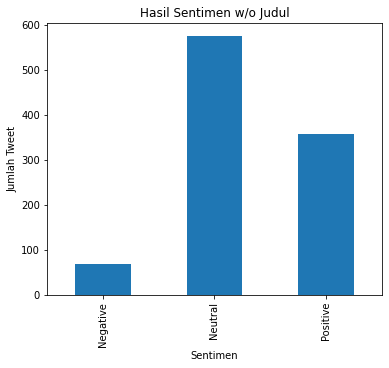

In [28]:
labels2.plot(kind='bar', title='Hasil Sentimen w/o Judul', ylabel='Jumlah Tweet',
           xlabel='Sentimen', figsize=(6, 5))

**WOW** mencengangkan**!!**

mari kita bandingkan lebih dekat

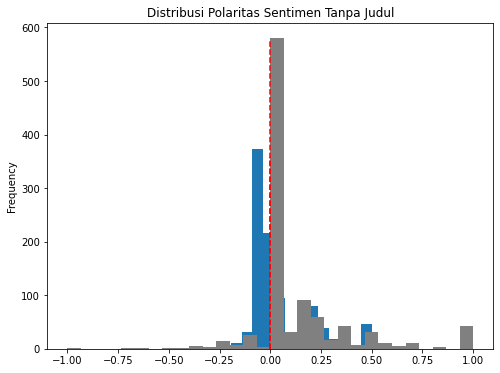

In [181]:
ax = data['Polarity'].plot(kind='hist',
                           bins=30,
                           title='Distribusi Polaritas Sentimen Dengan Judul',
                           figsize=(8, 6))

ymax=data.groupby('Polarity').size().max()
ax.vlines(x=0.0, ymin=0, ymax=ymax, colors='r', linestyle='--')

ax = data2['Polarity'].plot(kind='hist',
                           bins=30,
                           title='Distribusi Polaritas Sentimen Tanpa Judul',
                           color='grey',
                           figsize=(8, 6))

ymax=data2.groupby('Polarity').size().max()
ax.vlines(x=0.0, ymin=0, ymax=ymax, colors='r', linestyle='--')

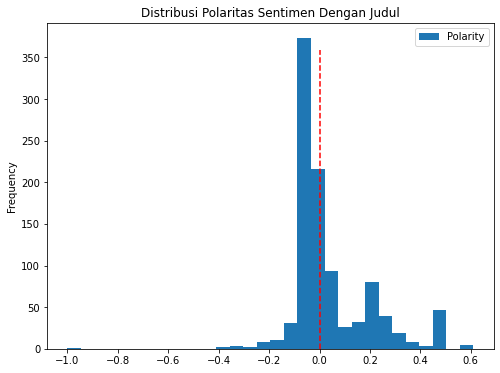

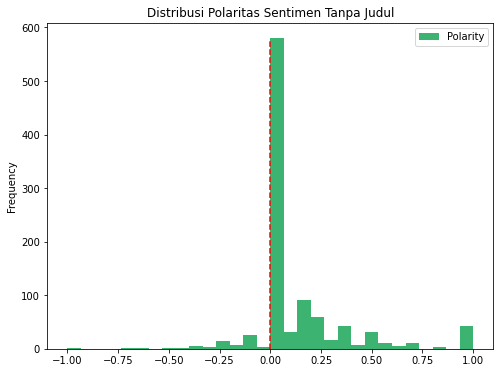

In [245]:
ax = data.plot(kind='hist', y='Polarity',
                           bins=30,
                           title='Distribusi Polaritas Sentimen Dengan Judul',
                           figsize=(8, 6))

ymax=data.groupby('Polarity').size().max()
ax.vlines(x=0.0, ymin=0, ymax=ymax, colors='r', linestyle='--')

ax = data2.plot(kind='hist', y='Polarity',
                           bins=30,
                           title='Distribusi Polaritas Sentimen Tanpa Judul',
                           color='mediumseagreen',
                           figsize=(8, 6))

ymax=data2.groupby('Polarity').size().max()
ax.vlines(x=0.0, ymin=0, ymax=ymax, colors='r', linestyle='--')

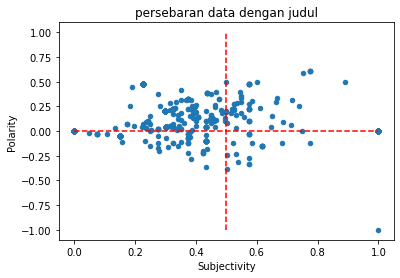

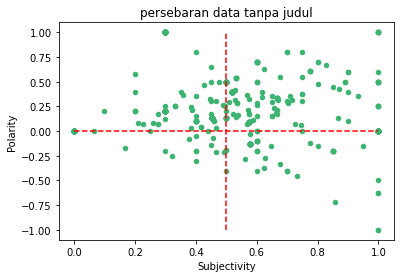

In [244]:
a = data.plot.scatter(x='Subjectivity', y='Polarity', title='persebaran data dengan judul')
a.vlines(x=0.5, ymin=-1, ymax=1, colors='r', linestyle='--')
a.hlines(y=0, xmin=0, xmax=1, colors='r', linestyle='--')

b = data2.plot.scatter(x='Subjectivity', y='Polarity', color='mediumseagreen', title='persebaran data tanpa judul')
b.vlines(x=0.5, ymin=-1, ymax=1, colors='r', linestyle='--')
b.hlines(y=0, xmin=0, xmax=1, colors='r', linestyle='--')

In [249]:
print(labels)
print(labels2)

Label
Negative    446
Neutral     197
Positive    357
dtype: int64
Label
Negative     68
Neutral     575
Positive    357
dtype: int64


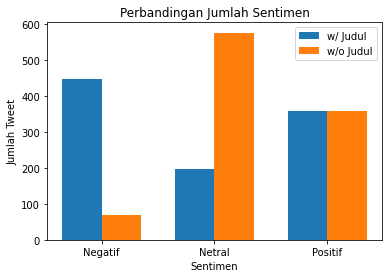

In [288]:
import numpy as np
import matplotlib.pyplot as plt

index = np.arange(3)
bar_width = 0.35

fig, ax = plt.subplots()
title = ax.bar(index, data.groupby('Label').size(), bar_width,
                label='w/ Judul')

no_title = ax.bar(index+bar_width, data2.groupby('Label').size(),
                 bar_width, label='w/o Judul')

ax.set_xlabel('Sentimen')
ax.set_ylabel('Jumlah Tweet')
ax.set_title('Perbandingan Jumlah Sentimen')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['Negatif', 'Netral', 'Positif'])
ax.legend()

plt.show()

terlihat bahwa jumlah sentimen bermuatan:  
**negatif** berkurang dari **446** tweet menjadi **68** tweet (-378)  
**netral** bertambah dari **197** tweet menjadi **575** tweet (+378)  
**positif** *stagnan*, tidak bertambah atau berkurang  
  
jadi dapat disimpulkan bahwa dengan mengeliminasi kata-kata bermuatan negatif **madness, strange** yang termuat dalam judul film, akan mempengaruhi hasil penilaian polarity dan pelabelan pada setiap kalimat/tweet.  
hal tersebut menjadikan **378** tweet yang tadinya berlabel *negatif* berubah menjadi berlabel *netral*.  
  
    
***hasil analisis terhadap 1000 tweet*

**JADI ...**  
saat melakukan analisis sentimen, kita juga harus memperhatikan susunan kata yang terkandung dalam kalimat yang akan dianalisis.  
karena setiap kata yang memiliki nilai *polaritas* (positif atau negatif) akan mempengaruhi hasil penilaian sentimen.  
meskipun pada kenyataannya kata tersebut seharusnya bukan bagian dari penilaian, melainkan objek yang akan dianalisis (hanya bagian dari judul atau merek atau yang lainnya).  
  

selanjutnya, mari kita lihat berapa perbandingan antara tweet yang berupa *fakta* dan *opini*

In [20]:
def getTextType(val):
    if val < 0.5:
        return 'Fact'
    else:
        return 'Opinion'

In [21]:
data3 = data2.copy()

In [22]:
data3['Type'] = data3['Subjectivity'].apply(getTextType)

In [23]:
data3['Type-Label'] = data3[['Type', 'Label']].apply("-".join, axis=1)

In [59]:
data3.head()

,New,Clean,Subjectivity,Polarity,Score,Label,Type,Type-Label,Class
0,wanda chasing doctor strange thru underground ...,wanda chasing doctor thru underground corridor,0.000000,0.000000,0,Neutral,Fact,Fact-Neutral,1
1,official new multiverseofmadness posters docto...,official new multiverseof posters doctor amp...,0.454545,0.136364,1,Positive,Fact,Fact-Positive,1
2,new posters elizabeth olsen benedict cumberbat...,new posters elizabeth olsen benedict cumberbat...,0.454545,0.136364,1,Positive,Fact,Fact-Positive,1
3,multiverseofmadness director sam raimi origina...,multiverseof director sam raimi originally wa...,0.575000,0.087500,1,Positive,Opinion,Opinion-Positive,1
4,doctor strange best mcu origin film mile,doctor best mcu origin film mile,0.300000,1.000000,1,Positive,Fact,Fact-Positive,1


Type
Fact       621
Opinion    379
dtype: int64


<AxesSubplot:title={'center':'Hasil Subjektivitas w/o Judul'}, xlabel='Subjektivitas', ylabel='Jumlah Tweet'>

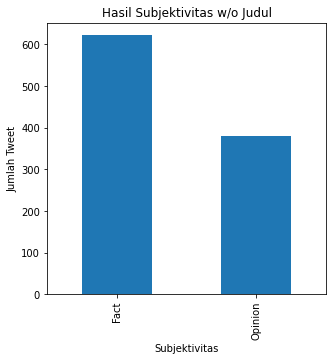

In [25]:
tweet_type = data3.groupby('Type').size()
print(tweet_type)

tweet_type.plot(kind='bar', title='Hasil Subjektivitas w/o Judul', ylabel='Jumlah Tweet',
           xlabel='Subjektivitas', figsize=(5, 5))

In [26]:
types = data3.groupby('Type')['Label'].value_counts()
types

Type     Label   
Fact     Neutral     416
         Positive    192
         Negative     13
Opinion  Positive    165
         Neutral     159
         Negative     55
Name: Label, dtype: int64

<AxesSubplot:title={'center':'Hasil Sentimen w/o Judul berdasarkan Subjektivitas'}, ylabel='Sentimen'>

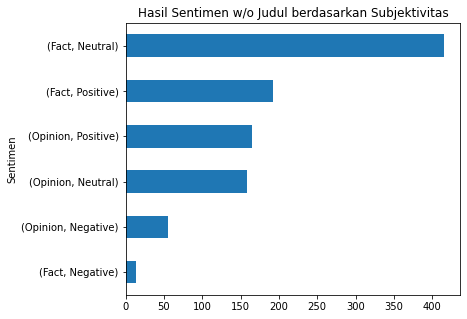

In [27]:
types.sort_values().plot(kind='barh', title='Hasil Sentimen w/o Judul berdasarkan Subjektivitas', ylabel='Jumlah Tweet',
           xlabel='Sentimen', figsize=(6, 5))

dari bar chart diatas dapat dilihat:  
tweet yang berisi **fakta** dan bersifat **netral** adalah tweet yang paling banyak dicuitkan oleh tweetizen  
tweet yang berisi **fakta** dan bersifat **negatif** adalah tweet yang paling sedikit dicuitkan oleh tweetizen

***hasil analisis terhadap 1000 tweet*

In [28]:
fac = data3[data3['Type'] == 'Fact'].groupby(['Type', 'Label']).size().reset_index(name='count')
opi = data3[data3['Type'] == 'Opinion'].groupby(['Type', 'Label']).size().reset_index(name='count')

In [32]:
import matplotlib.pyplot as plt

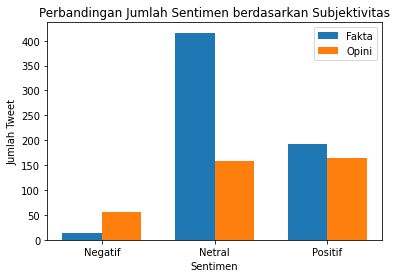

In [33]:
index = np.arange(3)
bar_width = 0.35

fig, ax = plt.subplots()
fact = ax.bar(index, fac['count'], bar_width, label='Fakta')

opninion = ax.bar(index+bar_width, opi['count'], bar_width, label='Opini')

ax.set_xlabel('Sentimen')
ax.set_ylabel('Jumlah Tweet')
ax.set_title('Perbandingan Jumlah Sentimen berdasarkan Subjektivitas')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['Negatif', 'Netral', 'Positif'])
ax.legend()

plt.show()

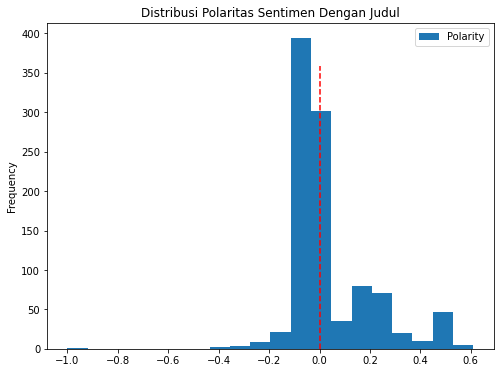

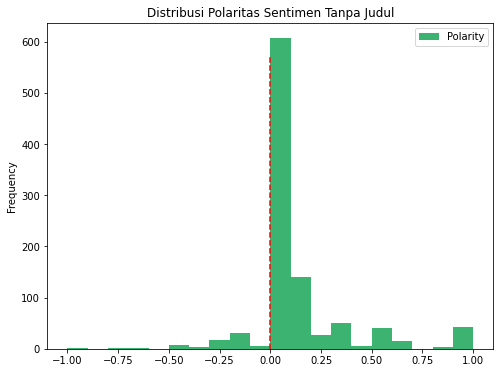

In [252]:
ax = data.plot(kind='hist', y='Polarity',
                           bins=20,
                           title='Distribusi Polaritas Sentimen Dengan Judul',
                           figsize=(8, 6))

ymax=data.groupby('Polarity').size().max()
ax.vlines(x=0.0, ymin=0, ymax=ymax, colors='r', linestyle='--')

ax = data2.plot(kind='hist', y='Polarity',
                           bins=20,
                           title='Distribusi Polaritas Sentimen Tanpa Judul',
                           color='mediumseagreen',
                           figsize=(8, 6))

ymax=data2.groupby('Polarity').size().max()
ax.vlines(x=0.0, ymin=0, ymax=ymax, colors='r', linestyle='--')

distribusi polaritas keduanya memiliki kemiringan data ke arah kanan (*positif*).

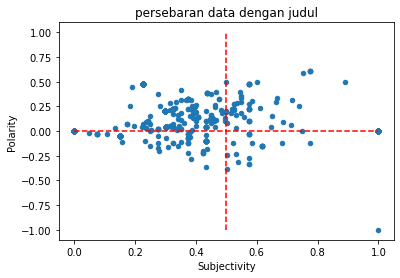

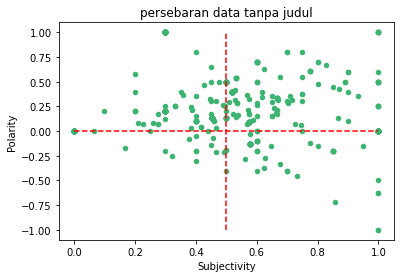

In [34]:
a = data.plot.scatter(x='Subjectivity', y='Polarity', title='persebaran data dengan judul')
a.vlines(x=0.5, ymin=-1, ymax=1, colors='r', linestyle='--')
a.hlines(y=0, xmin=0, xmax=1, colors='r', linestyle='--')

b = data2.plot.scatter(x='Subjectivity', y='Polarity', color='mediumseagreen', title='persebaran data tanpa judul')
b.vlines(x=0.5, ymin=-1, ymax=1, colors='r', linestyle='--')
b.hlines(y=0, xmin=0, xmax=1, colors='r', linestyle='--')

In [81]:
from PIL import Image

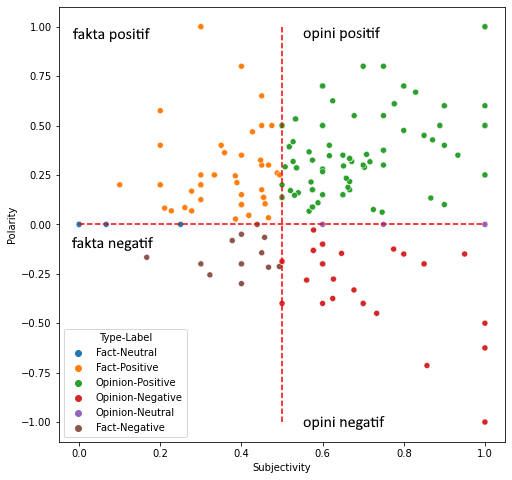

In [83]:
img = Image.open('scatterplot.png')
display(img)

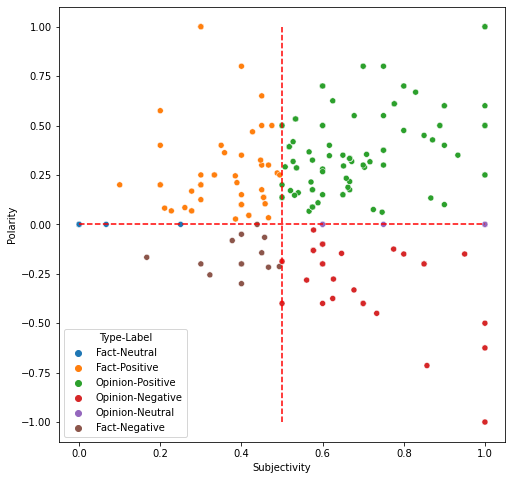

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# a = sns.scatterplot(x='Subjectivity', y='Polarity', hue='Label', data=data)
# a.vlines(x=0.5, ymin=-1, ymax=1, colors='r', linestyle='--')
# a.hlines(y=0, xmin=0, xmax=1, colors='r', linestyle='--')

plt.figure(figsize=(8,8))
b = sns.scatterplot(x='Subjectivity', y='Polarity', hue='Type-Label', data=data3)


b.vlines(x=0.5, ymin=-1, ymax=1, colors='r', linestyle='--')
b.hlines(y=0, xmin=0, xmax=1, colors='r', linestyle='--')

sekian dan terima kasih, semoga bermanfaat    
  
salam,  

*remember: the reviews are prone to bias (self-selection bias)*